In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

% matplotlib inline

In [2]:
def cost_func(X, y, theta, lambda_coeff):
    """Return value of cost function for linear regression for given theta, using L2 regularization"""
    m = len(y)
    cost = 1 / (2*m) * (np.sum((X.dot(theta) - y)**2) + lambda_coeff * (np.sum(theta[1:]**2)))
    return cost

In [3]:
def feature_normalize(X):
    """Return normalized X, arrays of mean and standard deviations of columns in X"""
    mean = np.mean(X)
    std = np.std(X)
    X_norm = (X - mean)/std
    return X_norm, mean, std

In [4]:
def gradient_desc(X, y, theta, alpha, lambda_coeff, num_iters):
    """Implementation on algorithm of gradient descent for multiple number of features using L2 regularization"""
    m = len(y)
    cost_history = []
    for i in range(num_iters):
        # expression for theta without regularization
        theta_wo_reg = theta - (alpha/m) * np.dot(X.T,(np.dot(X, theta) - y)) 
        
        temp = (1 - (alpha/m) * lambda_coeff) * theta_wo_reg
        temp[0] = theta_wo_reg[0]
        theta = temp
        cost_history.append(cost_func(X, y, theta, lambda_coeff))

    return theta, cost_history

In [5]:
def linear_regression(X, y, alpha, lambda_coeff, num_iters):   
    """Return theta vector received from gradient descent, means and standart deviations of columns in X 
    and values of cost function on every iteration of gradient descent"""
    X, mean, std = feature_normalize(X)
    X.insert(0, 'zero_feature', 1)
    theta = np.zeros(len(X.columns))
    theta, cost_history = gradient_desc(X, y, theta, alpha, lambda_coeff, num_iters)
    
    return X, theta, mean, std, cost_history

In [6]:
def normal_eqn(X, y, lambda_coeff=0):  
    """Return theta vector received from solving normal equation"""
    L = np.eye(X.shape[1])
    L[0][0] = 0
    theta = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X) + lambda_coeff * L), X.T), y)
    cost = cost_func(X, y, theta, lambda_coeff)
                    
    return theta, cost

# Linear regression for data with one feature

In [7]:
# Datasets were taken from machine learning course of Andrew Ng 

df = pd.read_csv('ex1data1.txt', names = ['population', 'profit'])
df.head()
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

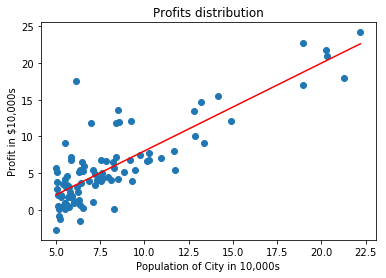

Theta: [ 5.83913363  4.59304002]


In [8]:
plt.scatter(X, y);
plt.title('Profits distribution');
plt.xlabel('Population of City in 10,000s');
plt.ylabel('Profit in $10,000s');

alpha=0.03
num_iters=500
lambda_coeff=0.

X_new, theta, mean, std, cost_history = linear_regression(X, y, alpha, lambda_coeff, num_iters)

#take two values from dataset to built straight line 
x_matrix = np.array((X_new.min().values, X_new.max().values))
y_vector = np.dot(x_matrix, theta)
x = [X_new.min()[1]*std+mean, X_new.max()[1]*std+mean]
plt.plot(x, y_vector, color = 'r')

plt.show()
print('Theta:', theta)

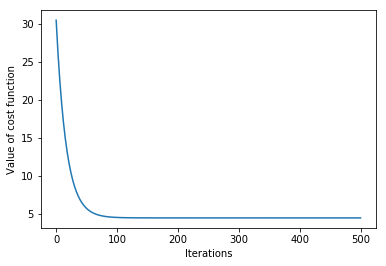

In [9]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Value of cost function')
plt.show()

## Normal Equation

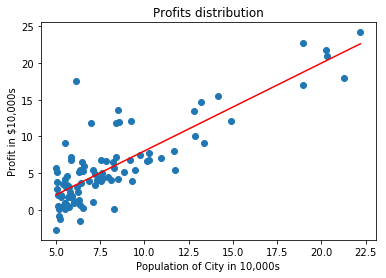

Theta: [-3.89578088  1.19303364]


In [10]:
plt.scatter(X, y);
plt.title('Profits distribution');
plt.xlabel('Population of City in 10,000s');
plt.ylabel('Profit in $10,000s');


X.insert(0, 'zero_feature', 1)
theta_n, cost_n = normal_eqn(X, y, lambda_coeff)
x_matrix = np.array((X.min().values, X.max().values))
y_vector = np.dot(x_matrix, theta_n)
plt.plot(x, y_vector, color = 'r')

plt.show()

# Note that values are different from received earlier, because this time X matrix was not normalized.
# Normal equation method does not require this
print('Theta:', theta_n)

## Comparing with sklearn

In [11]:
from sklearn import linear_model

df = pd.read_csv('ex1data1.txt', names = ['population', 'profit'])
df.head()
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
X, mean, std = feature_normalize(X)
X.insert(0, 'zero_feature', 1)

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print('sklearn:\n', regr.intercept_, regr.coef_[1])
print('my theta for gradient descent:\n', *theta)

sklearn:
 5.83913505155 4.59304113336
my theta for gradient descent:
 5.83913363178 4.59304001658


# Multiple features

In [13]:
df2 = pd.read_csv('ex1data2.txt', names = ['size of a house', 'number of bedrooms', 'price'])
X2 = df2[df2.columns[:-1]]
y2 = df2[df2.columns[-1]]
df2.head()

,size of a house,number of bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Theta: 340412.576804 106025.630028 -4541.2314074


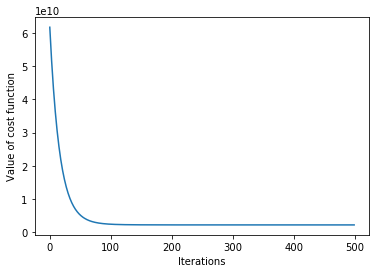

In [14]:
alpha=0.03
num_iters=500
lambda_coeff=1

X_new2, theta2, mean2, std2, cost_history2 = linear_regression(X2, y2, alpha, lambda_coeff, num_iters)

print('Theta:', *theta2)

plt.plot(cost_history2)
plt.xlabel('Iterations')
plt.ylabel('Value of cost function')
plt.show()

## Normal equation

In [15]:
X2.insert(0, 'zero_feature', 1)
theta_n2, cost_n2 = normal_eqn(X2, y2, lambda_coeff)
print('Theta:', *theta_n2)

Theta: 88647.5902325 138.967718583 -8284.92788432


## Comparing with sklearn

In [16]:
X2 = df2[df2.columns[:-1]]
y2 = df2[df2.columns[-1]]
X2, mean2, std2 = feature_normalize(X2)
X2.insert(0, 'zero_feature', 1)

regr2 = linear_model.LinearRegression()
regr2.fit(X2, y2)
print('sklearn:\n', regr2.intercept_, *regr2.coef_[1:])
print('my theta for gradient descent:\n', *theta2)

sklearn:
 340412.659574 109447.79647 -6578.35485416
my theta for gradient descent:
 340412.576804 106025.630028 -4541.2314074
